In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import numpy as np
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import math
import anyterrain as at
import time
import aStarLocal
import aStarGlobal

In [2]:
terrain = at.Terrain(0)


### One leg planner always work with fast speed

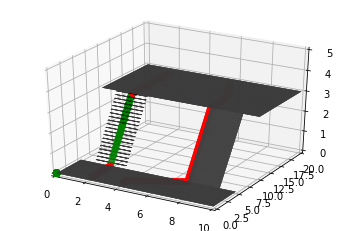

In [3]:
start = (4.0,1.0)
goal = (6.,18.)
anyAStarGlobal = aStarGlobal.AnymalAStarGlobal(start,goal,terrain)

anyAStarGlobal.run()



start = (2.0,1.0)
goal = (2.0,18.0)
anyAStarGlobal1 = aStarGlobal.AnymalAStarGlobal(start,goal,terrain)
anyAStarGlobal1.run()


fig = plt.figure(1)
ax = fig.gca(projection='3d')
anyAStarGlobal.plotOptimalPath(ax)
anyAStarGlobal1.plotOptimalPath(ax)
terrain.plotPlanes(ax)
plt.rcParams["figure.figsize"]=20,20




### Four-leg planner works in most cases

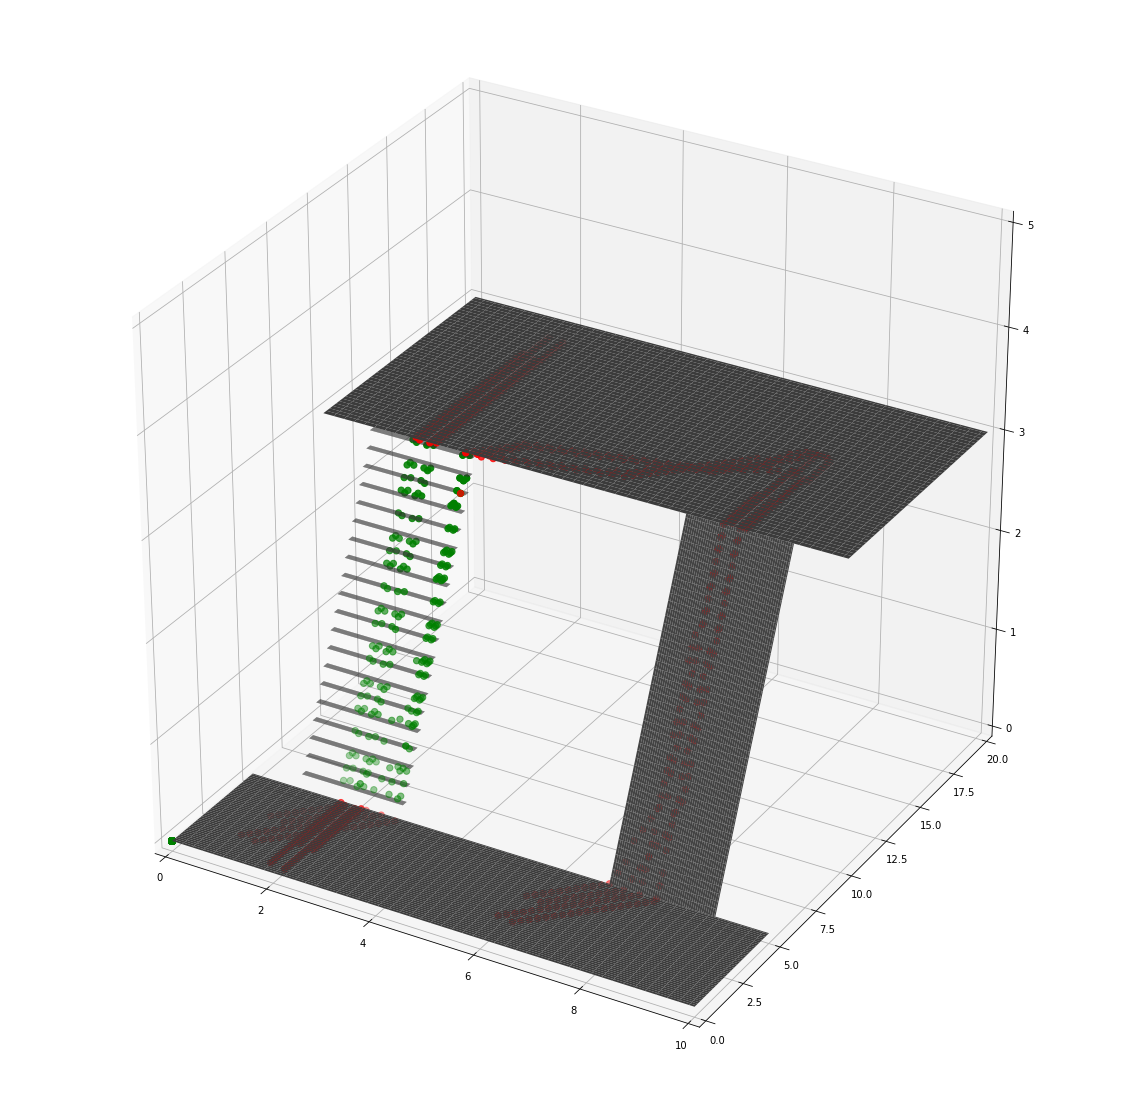

In [4]:
start = (2.0,1.0,3.14/2)
goal = (2,18,3.14/2)
anyAStarLocal = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal.run()

start = (1.0,2.0,3.14/2)
goal = (8,15.0,3.14/2)
anyAStarLocal1 = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal1.run()

start = (6.0,2.0,3.14/2)
goal = (8,15.0,3.14/2)
anyAStarLocal2 = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal2.run()

fig = plt.figure(2)
ax = fig.gca(projection='3d')
terrain.plotPlanes(ax)
plt.rcParams["figure.figsize"]=20,20
anyAStarLocal.plotOptimalPath(ax)
anyAStarLocal1.plotOptimalPath(ax)
anyAStarLocal2.plotOptimalPath(ax)


### But in some special cases, the four-leg planner gets stuck

A* stucks and failed!


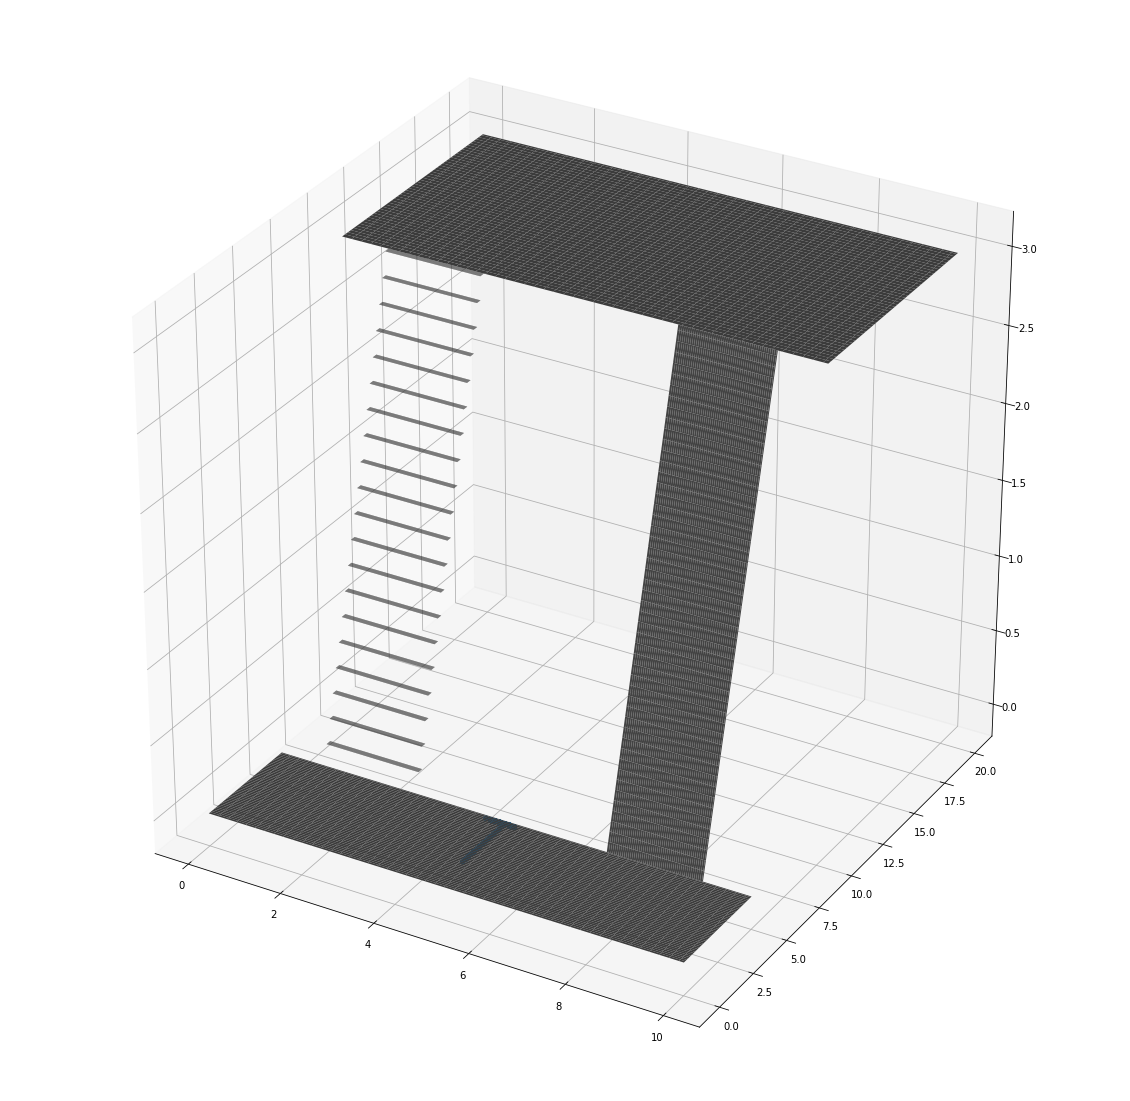

In [5]:
start = (5.0,1.0,3.14/2)
goal = (5,18,3.14/2)
anyAStarLocal = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal.run()

fig = plt.figure(3)
ax = fig.gca(projection='3d')
terrain.plotPlanes(ax)
plt.rcParams["figure.figsize"]=20,20
anyAStarLocal.plotSearchProgress(ax)

### So we have a cascaded A* method. One Leg A* is usd to set local target for four legs A*

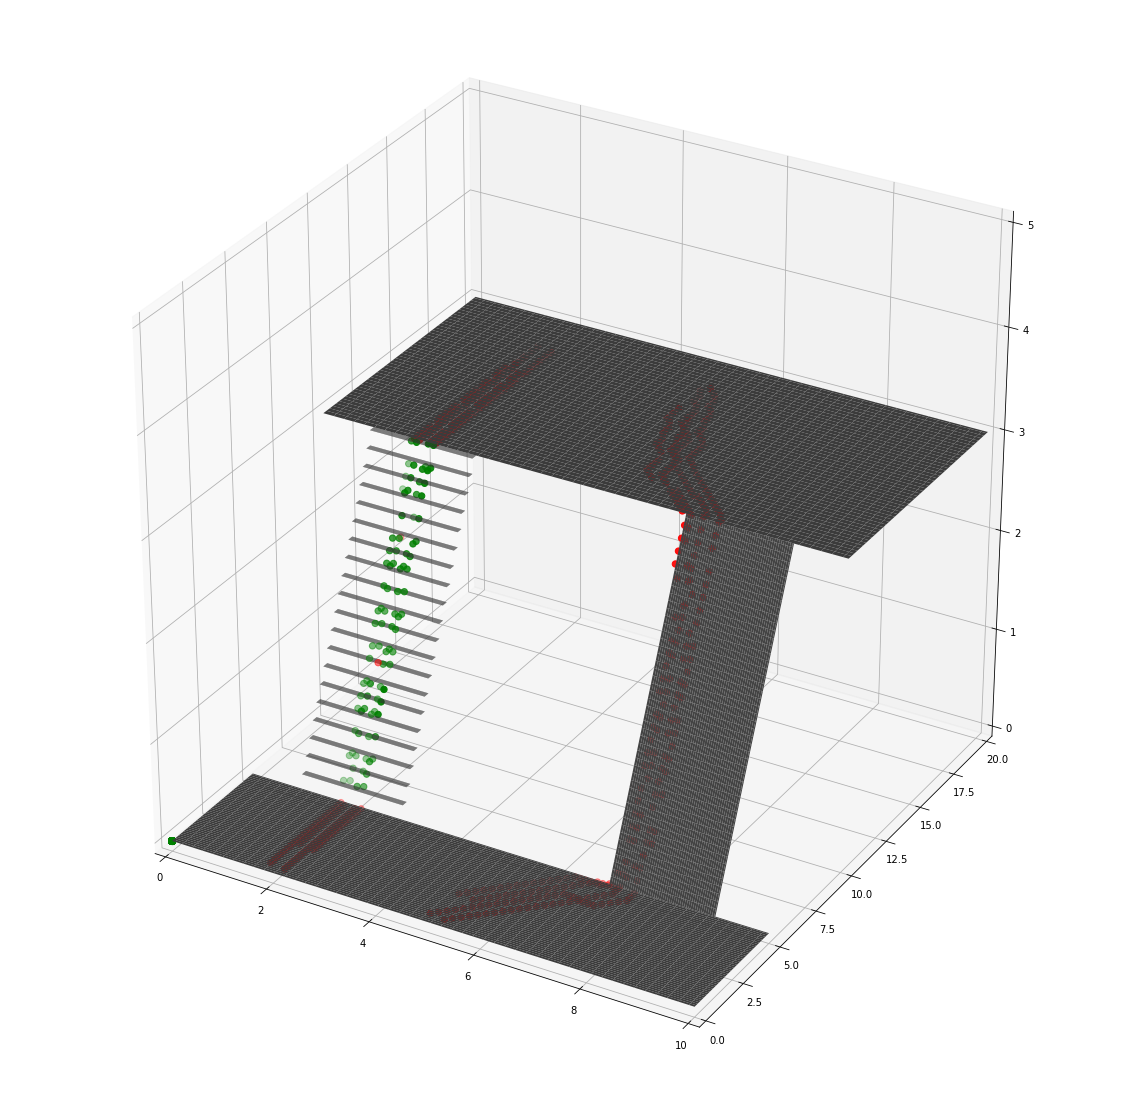

In [6]:
startGlobal = (5.0,1.0)
goalGlobal = (5.0,18.0)
startLocal = (startGlobal[0],startGlobal[1],3.14/2)

flagArrivedTheGoal = False

terrain = at.Terrain(0)
fig = plt.figure(1)
ax = fig.gca(projection='3d')
terrain.plotPlanes(ax)

counter = 0

while True:
    globalPlanner = aStarGlobal.AnymalAStarGlobal(startGlobal,goalGlobal,terrain)
    globalPlanner.run()
    optimalPath, localTarget = globalPlanner.getOptimalPath(0.7)
    refinedLocalTarget = globalPlanner.refineTarget(localTarget)
    
    localTarget = (refinedLocalTarget[0],refinedLocalTarget[1],3.14/2)
    
#     print("localTarget =",localTarget,"startLocal = ",startLocal)
    
    localPlanner = aStarLocal.AnymalAStarLocal(startLocal,localTarget,terrain)
    localPlanner.run()
    localPlanner.plotOptimalPath(ax)
    
    startGlobal = (localTarget[0],localTarget[1])
    startLocal = localTarget
    
    counter = counter + 1
    if counter == 10:
        break
        

startGlobal = (2.0,1.0)
goalGlobal = (2.0,18.0)
startLocal = (startGlobal[0],startGlobal[1],3.14/2)
counter = 0

while True:
    globalPlanner = aStarGlobal.AnymalAStarGlobal(startGlobal,goalGlobal,terrain)
    globalPlanner.run()
    optimalPath, localTarget = globalPlanner.getOptimalPath(0.7)
    refinedLocalTarget = globalPlanner.refineTarget(localTarget)
    
    localTarget = (refinedLocalTarget[0],refinedLocalTarget[1],3.14/2)
    
#     print("localTarget =",localTarget,"startLocal = ",startLocal)
    
    localPlanner = aStarLocal.AnymalAStarLocal(startLocal,localTarget,terrain)
    localPlanner.run()
    localPlanner.plotOptimalPath(ax)
    
    startGlobal = (localTarget[0],localTarget[1])
    startLocal = localTarget
    
    counter = counter + 1
    if counter == 10:
        break